In [1]:
import pandas as pd
import numpy as np
from prepare import *
from gurobipy import *
from MIP_solver import *
from MIP_solver_2 import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#y as a function of x
def fun_3(x1,x2):
    return 10*np.exp(-((x1-5)/3)**2-((x2-5)/4)**2)+10*np.exp(-(x1**2)-(x2-4.5)**2)

In [3]:
#generate x
x1=np.linspace(0, 5, 26)
x2=np.linspace(0, 5, 26)

In [4]:
X1=np.zeros(len(x1)*len(x2))
X2=np.zeros(len(x1)*len(x2))
for i in range(len(x1)):
    for j in range(len(x2)):
        X1[i*len(x2)+j]=x1[i]
        X2[i*len(x2)+j]=x2[j]
x=np.column_stack((X1,X2))
y=fun_3(X1,X2)

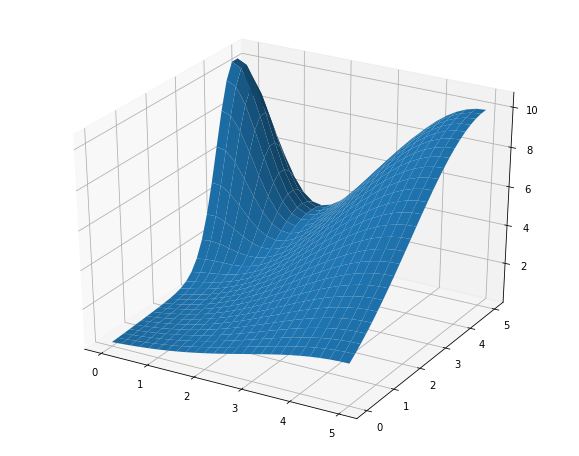

In [5]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x1_plot,x2_plot=np.meshgrid(x1, x2)
zs = np.array([fun_3(x_given,y_given) for x_given,y_given in zip(np.ravel(x1_plot), np.ravel(x2_plot))])
y_plot=zs.reshape(x1_plot.shape)
ax.plot_surface(x1_plot, x2_plot, y_plot)
plt.show() 

In [5]:
flag=1 #regression tree
rf=get_rf(x,y,2,flag)
trees=list()
trees=get_input(rf)

In [9]:
leaves(trees,1).shape

(418,)

In [10]:
splits(trees,1).shape

(417,)

In [6]:
def test(x,x_input):
    return (-1e-1+x_input[0]**2+x_input[1]**2-x_input[0]*x)/x_input[1]

In [10]:
x_test=np.linspace(0, 5, 51)
y_test=test(x_test,[0.1, 3.900000214576722])

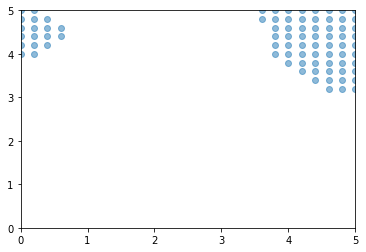

In [16]:
plt.xlim(0,5)
plt.ylim(0,5)
plt.scatter(x[y>=8,0],x[y>=8,1],alpha=0.5)
#plt.plot(x_test,y_test)

In [8]:
eta_1=0
eta_2=50
bisection(trees,flag,eta_1,eta_2,8)

Changed value of parameter LazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Optimize a model with 82 rows, 86 columns and 162 nonzeros
Model has 1 quadratic constraint
Model has 1698 general constraints
Variable types: 4 continuous, 82 integer (82 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e+00, 5e+00]
  RHS range        [1e+01, 1e+01]
Presolve added 0 rows and 765 columns
Presolve removed 82 rows and 0 columns
Presolve time: 0.01s
Presolved: 0 rows, 851 columns, 0 nonzeros
Variable types: 851 continuous, 0 integer (0 binary)

Root relaxation: objective 1.051608e+01, 0 iterations, 0.00 seconds
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0

H  132    34                       4.9580689   10.17568   105%  42.8   83s
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
   159    15    6.97704    8    -    4.95807   10.17568   105%  41.1   99s
Find a violated constraint!
Find a violated constraint!
*  205     0               6       4.9986600    8.39879  68.0%  38.4  106s

Cutting planes:
  Implied bound: 1
  Lazy constraints: 21

Explored 211 nodes (8892 simplex iterations) in 106.75 seconds
Thread count was 8 (of 8 available processors)

Solution count 4: 4.99866 4.95807 4.63363 3.07196 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.998660041742e+00, best bound 4.998660041742e+00, gap 0.0000%

 12.5 


 [0.1     3.50001] 

Changed value of parameter LazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Optimize a model with 82 rows, 86 columns and 162 nonzeros
Model has 1 quadratic constraint
Model has 1698 general constraints
Variable types: 4 continuous, 82 integer (82 

Variable types: 1446 continuous, 652 integer (652 binary)

Root relaxation: objective 1.051608e+01, 988 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   10.51608    0  143          -   10.51608      -     -    0s
Find a violated constraint!
Find a violated constraint!
     0     2   10.51608    0  143          -   10.51608      -     -    7s
Find a violated constraint!
Find a violated constraint!
    23    20   10.51608    5  446          -   10.51608      -   101   15s
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
    27    22   10.51608    5  196          -   10.51608      -   102   30s
Find a violated constraint!
Find a violated constraint!
    31    29    7.73221    6  113          -   10.51608      -  98.5   38s
Find a violated constraint!
Find a violated constraint!
    54  

Find a violated constraint!
Find a violated constraint!
*  245     0              15       8.2904744    8.29047  0.00%  28.4  181s

Cutting planes:
  Implied bound: 1
  Lazy constraints: 29

Explored 246 nodes (7993 simplex iterations) in 181.84 seconds
Thread count was 8 (of 8 available processors)

Solution count 5: 8.29047 6.01603 5.71433 ... 4.60579

Optimal solution found (tolerance 1.00e-04)
Best objective 8.290474362533e+00, best bound 8.290474362533e+00, gap 0.0000%

 15.234375 


 [0.1       3.9000101] 

Changed value of parameter LazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Optimize a model with 82 rows, 86 columns and 162 nonzeros
Model has 1 quadratic constraint
Model has 1698 general constraints
Variable types: 4 continuous, 82 integer (82 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e+00, 5e+00]
  RHS range        [1e+01, 1e+01]
  QRHS range       [

Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
*   65    27               7       0.4589745   10.51608  2191%  57.9   60s
Find a violated constraint!
*   71    24              11       3.0719620   10.51608   242%  53.1   69s
H   74    22                       4.4015796   10.51608   139%  59.0   78s
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
   118    28    5.93607    7  260    4.40158   10.51608   139%  45.3   95s
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
*  127    18              10       4.6336300   10.51608   127%  46.2  113s
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
*  160    22               9       6.0160334   10.51608  74.8%  42.1  138s
Find a violated co

Find a violated constraint!
Find a violated constraint!
    17    17   10.51608    4  114          -   10.51608      -   119   18s
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
H   34    28                       3.4383225   10.51608   206%  89.5   45s
Find a violated constraint!
Find a violated constraint!
H   39    19                       4.1330672   10.51608   154%  80.0   63s
Find a violated constraint!
*   59    29               9       5.3375521   10.51608  97.0%  61.3   80s
Find a violated constraint!
Find a violated constraint!
    86    20 infeasible    7         5.33755   10.51608  97.0%  53.8   89s
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
*  106    16               8       5.7143253   10.51608  84.0%  47.7  125s
Find a violated constraint!
Find a violated co

[8.290474362532613, array([0.1      , 3.9000101])]

In [8]:
x_input=[0., 3.900000214576722]
eta_1=0
eta_2=50
bisection_2(trees,flag,eta_1,eta_2,8,x_input)

Changed value of parameter LazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Optimize a model with 83 rows, 86 columns and 164 nonzeros
Model has 1 quadratic constraint
Model has 1698 general constraints
Variable types: 4 continuous, 82 integer (82 binary)
Coefficient statistics:
  Matrix range     [1e-01, 4e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 2e+01]
Found heuristic solution: objective -0.0000000
Presolve added 0 rows and 765 columns
Presolve removed 83 rows and 0 columns
Presolve time: 0.00s
Presolved: 0 rows, 851 columns, 0 nonzeros
Variable types: 851 continuous, 0 integer (0 binary)

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0516077e+01   0.000000e+00   0.000000e+00      7s

Root relaxation: objective 1.051608e+01, 0 iterations, 0.01 seconds
Find a violated constraint!
Find a violated constraint!
Find a violated constra

Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
H   35    27                       7.5567003   10.51608  39.2%   113  112s
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
    68    15 infeasible    7         7.55670   10.51608  39.2%  74.5  130s
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
   124     1    8.11024   10  150    7.55670    8.99568  19.0%  50.8  171s

Cutting planes:
  Lazy constraints: 31

Explored 129 nodes (7687 simplex iterations) in 171.29 seconds
Thread count was 8 (of 8 available processors)

Solution count 4: 7.5567 0.421321 0.16204 -0 

Optimal solution found (tolerance 1.00e-04)
Best objective 7.556700258270e+00, best bound 7.556700258270e+00, gap 0.0000%

 25.0

Find a violated constraint!
   103    14    9.41000    6  221    7.55670   10.51608  39.2%  58.2  158s
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
*  118    22              11       7.5667067   10.51608  39.0%  54.9  199s
Find a violated constraint!
Find a violated constraint!
   122    14    8.41637    7  145    7.56671   10.51608  39.0%  53.3  208s
Find a violated constraint!
Find a violated constraint!
*  131    17              11       8.2792959   10.51608  27.0%  50.0  231s
Find a violated constraint!
H  150     0                       8.4274666   10.51608  24.8%  44.5  247s
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
   175     1    8.95913    9  197    8.42747    8.95913  6.31%  4

Find a violated constraint!
Find a violated constraint!
   138     0 infeasible    5         7.60628    9.14000  20.2%  45.0  173s
*  140     0              11       7.7809154    8.51055  9.38%  44.4  181s

Cutting planes:
  Lazy constraints: 31

Explored 144 nodes (7594 simplex iterations) in 181.30 seconds
Thread count was 8 (of 8 available processors)

Solution count 6: 7.78092 7.60628 7.5567 ... -0

Optimal solution found (tolerance 1.00e-04)
Best objective 7.780915418370e+00, best bound 7.780915418370e+00, gap 0.0000%

 26.5625 


 [3.9000101  3.30001019] 

Changed value of parameter LazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Optimize a model with 83 rows, 86 columns and 164 nonzeros
Model has 1 quadratic constraint
Model has 1698 general constraints
Variable types: 4 continuous, 82 integer (82 binary)
Coefficient statistics:
  Matrix range     [1e-01, 4e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e+00, 1e+00]
  RH

  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e-01, 5e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 2e+01]
  QRHS range       [3e+01, 3e+01]
Found heuristic solution: objective -0.0000000
Presolve added 2263 rows and 2265 columns
Presolve time: 0.13s
Presolved: 2346 rows, 2351 columns, 6064 nonzeros
Presolved model has 1428 SOS constraint(s)
Variable types: 1567 continuous, 784 integer (784 binary)

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0516077e+01   2.644538e+03   0.000000e+00      7s
    1088    1.0516077e+01   0.000000e+00   0.000000e+00      7s

Root relaxation: objective 1.051608e+01, 1088 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   10.51608    0   80   -0.00000   10.51608      -     -    7s
Find a violated constraint!
Find a violated constraint!



     0     0   10.51608    0   80   -0.00000   10.51608      -     -    7s
Find a violated constraint!
Find a violated constraint!
     0     0   10.51608    0   80   -0.00000   10.51608      -     -   15s
H    0     0                       0.1620396   10.51608  6390%     -   22s
     0     0   10.51608    0  117    0.16204   10.51608  6390%     -   22s
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
     0     0   10.51608    0  117    0.16204   10.51608  6390%     -   37s
Find a violated constraint!
H    0     0                       0.4213214   10.51608  2396%     -   44s
Find a violated constraint!
     0     2   10.51608    0  325    0.42132   10.51608  2396%     -   52s
Find a violated constraint!
Find a violated constraint!
     7    11   10.34175    3  316    0.42132   10.51608  2396%   162   61s
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a 

Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
    31    29    8.87951    6   93    0.42132   10.51608  2396%   117   86s
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
H   35    27                       7.5567003   10.51608  39.2%   113  111s
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
    70    19   10.51608    4  148    7.55670   10.51608  39.2%  73.9  137s
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
    83     9 infeasible    5         7.55670   10.51608  39.2%  64.9  153s
*   95     9              11       7.6062782   10.51608  38.3%  59.8  161s
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
Find a violated constraint!
*  133     4              12       7.

[8.088147859239545, array([4.1000099 , 3.30001019])]